In [ ]:
# Gerekli Kütüphanelerin Yüklenmesi

import numpy as np
from random import shuffle
import scipy.misc
from PIL import Image

import cv2
import os
import glob

In [ ]:
import tensorflow

tensorflow.__version__
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os
from PIL import Image
import os
import time
from skimage import segmentation
import torch
import torch.nn as nn
import tensorflow as tf
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import concatenate
import imageio
import sys
import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Eğitim verilerinin olduğu yollar

path_Train1 = "/content/drive/MyDrive/Data-2/train/A"
path_Train2 = "/content/drive/MyDrive/Data-2/train/B"
path_Train3 = "/content/drive/MyDrive/Data-2/train/label"

# Test verilerinin olduğu yollar

path_Test1 = "/content/drive/MyDrive/Data-2/test/A"
path_Test2 = "/content/drive/MyDrive/Data-2/test/B"
path_Test3 = "/content/drive/MyDrive/Data-2/test/label"

In [ ]:
# Görselleri tutacağımız boş listeler

from tqdm import tqdm
A=[]
B=[]
labels=[]
ATest=[]
BTest=[]
labelsTest=[]

In [ ]:
# Veri Ön İşleme

In [ ]:
# 1 - Görüntülerin uzantılarını ve adlarını proje için uygun hale getiriyoruz.
"""
def change_doc_name(path, pre_ext, new_ext):
    docs = os.listdir(path)
    name = 1
    for doc in docs:
        if doc.endswith(pre_ext):
            pre_path = os.path.join(path, doc)

            new_name = f"{name}{new_ext}"
            yeni_path = os.path.join(path, new_name)

            os.rename(pre_path, yeni_path)
            name += 1
    print("Dosyaların adı ve uzantısı değiştirildi.")


path = path_Test2
pre_ext = '.jpg'
new_ext = '.png'

change_doc_name(path, pre_ext, new_ext)
"""

'\ndef change_doc_name(path, pre_ext, new_ext):\n    docs = os.listdir(path)\n    name = 1\n    for doc in docs:\n        if doc.endswith(pre_ext):\n            pre_path = os.path.join(path, doc)\n\n            new_name = f"{name}{new_ext}"\n            yeni_path = os.path.join(path, new_name)\n\n            os.rename(pre_path, yeni_path)\n            name += 1\n    print("Dosyaların adı ve uzantısı değiştirildi.")\n\n\npath = path_Test2\npre_ext = \'.jpg\'\nnew_ext = \'.png\'\n\nchange_doc_name(path, pre_ext, new_ext)\n'

In [ ]:
# 2 - Görsellerin boyutlarını değiştirme işlemi
# Her bir görselin boyutunu (512,512) olacak şekilde değiştiriyoruz.
"""
doc_path = path_Test2

target_size = (512, 512)

doc_list = os.listdir(doc_path)
img_ext = [".jpg"]

for dos_name in doc_list:
    ext = os.path.splitext(dos_name)[1].lower()

    if ext in img_ext:
        img_path = os.path.join(doc_path, dos_name)
        img = cv2.imread(img_path)

        d_img = cv2.resize(img, target_size)

        cv2.imwrite(img_path, d_img)

print("Tüm resimler başarıyla dönüştürüldü.")
"""

Tüm resimler başarıyla dönüştürüldü.


In [ ]:
# 3 - Klasör dizinindeki görselleri sıralı bir biçimde listelere alıyoruz

def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    A = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return A

klasor_yolu = path_Train1
A = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    B = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return B

# Kullanım örneği:
klasor_yolu = path_Train2
B = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    labels = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return labels

klasor_yolu = path_Train3
labels = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    ATest = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return ATest

klasor_yolu = path_Test1
ATest = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    BTest = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return BTest

klasor_yolu = path_Test2
BTest = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



def klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu):
    dosyalar = sorted(os.listdir(klasor_yolu))
    labelsTest = [cv2.imread(os.path.join(klasor_yolu, dosya_adi)) for dosya_adi in dosyalar]
    return labelsTest

klasor_yolu = path_Test3
labelsTest = klasor_icindeki_gorselleri_sirali_ekle(klasor_yolu)



In [ ]:
# Resimlerin ekisk bir şekilde geldiğini kontrol ediyoruz

print(len(labels))
print(len(A))
print(len(B))
print(len(labelsTest))
print(len(ATest))
print(len(BTest))

800
936
936
400
652
740


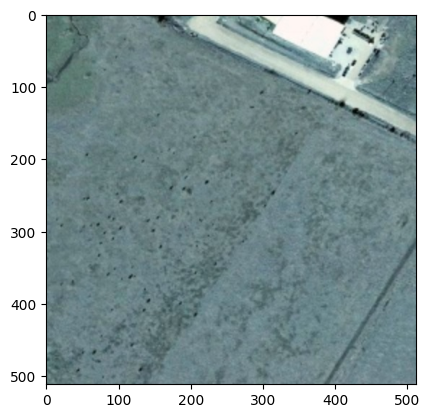

In [ ]:
imgplot = plt.imshow(A[1])

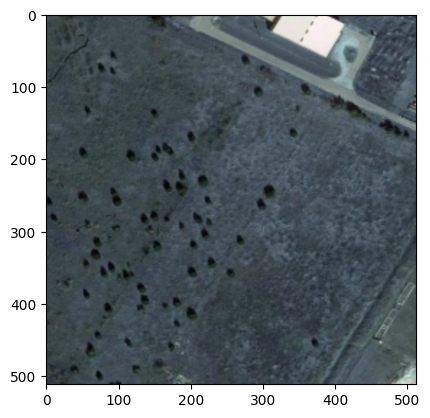

In [ ]:
imgplot = plt.imshow(B[1])

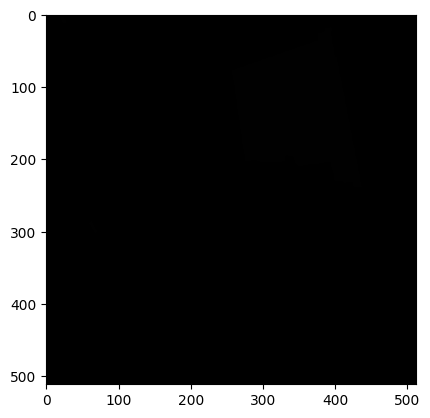

In [ ]:
imgplot = plt.imshow(labels[13])

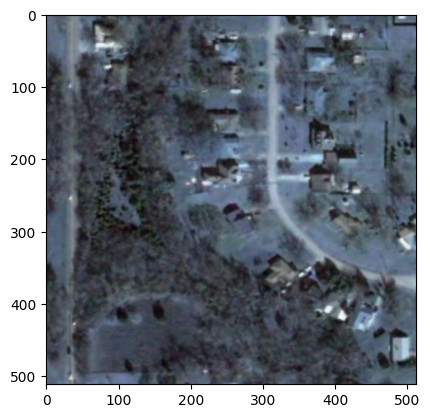

In [ ]:
imgplot = plt.imshow(ATest[10])

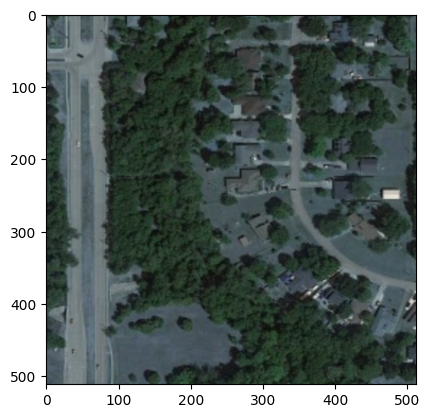

In [ ]:
imgplot = plt.imshow(BTest[10])

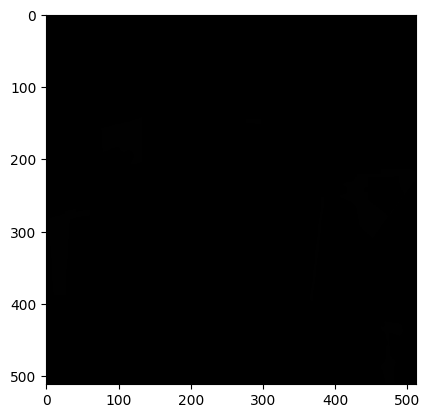

In [ ]:
imgplot = plt.imshow(labelsTest[13])

In [ ]:
# Görsellerin boyutlarını kontrol ediyoruz.

print(type(B[10]))
print(B[10].shape)
print(type(B[10].shape))
print("*****")
print(type(A[255]))
print(A[255].shape)
print(type(A[255].shape))
print("*****")
print(type(labelsTest[13]))
print(labelsTest[13].shape)
print(type(labelsTest[13].shape))

<class 'numpy.ndarray'>
(512, 512, 3)
<class 'tuple'>
*****
<class 'numpy.ndarray'>
(512, 512, 3)
<class 'tuple'>
*****
<class 'numpy.ndarray'>
(512, 512, 3)
<class 'tuple'>


In [ ]:
# Eğitim verilerini 3'lü gruplar haline getiriyoruz

tupleList = []
for i in range(800):
    pair = (A[i],B[i],labels[i])
    tupleList.append(pair)



# Eğitim verilerini 3'lü gruplar haline getiriyoruz

tupleListTest = []
for j in range(400):
    pairTest = (ATest[j],BTest[j],labelsTest[j])
    tupleListTest.append(pairTest)

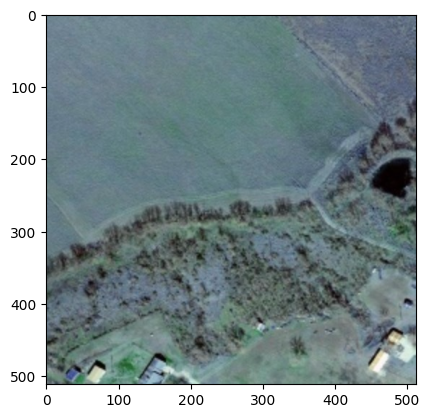

In [ ]:
imgplot = plt.imshow(tupleList[9][0])

In [ ]:
print(tupleList[9][0].shape)

(512, 512, 3)


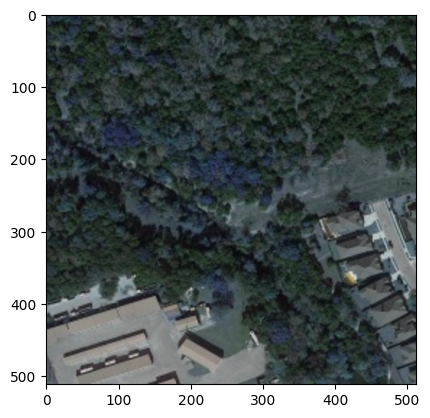

In [ ]:
imgplot = plt.imshow(tupleListTest[0][1])

In [ ]:
# Grup halinde olan görüntülerin boyutlarını kontrol ediyoruz, modele girecek olan verileri.

print(tupleList[0][0].shape)
print(tupleList[0][1].shape)
print(tupleList[0][2].shape)
print(tupleListTest[0][2].shape)
print(tupleListTest[0][2].shape)
print(tupleListTest[0][2].shape)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


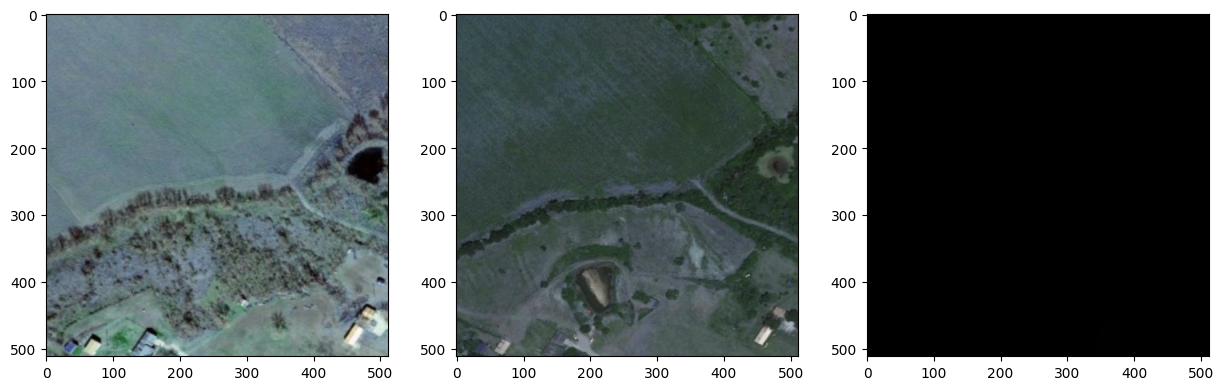

In [ ]:
# Deneme - 1

fig ,ax = plt.subplots(1,3,figsize=(15,15))
i=0
while(i<10):
    ax[0].imshow(tupleList[i][0])
    ax[1].imshow(tupleList[i][1])
    ax[2].imshow(tupleList[i][2])
    i=i+1

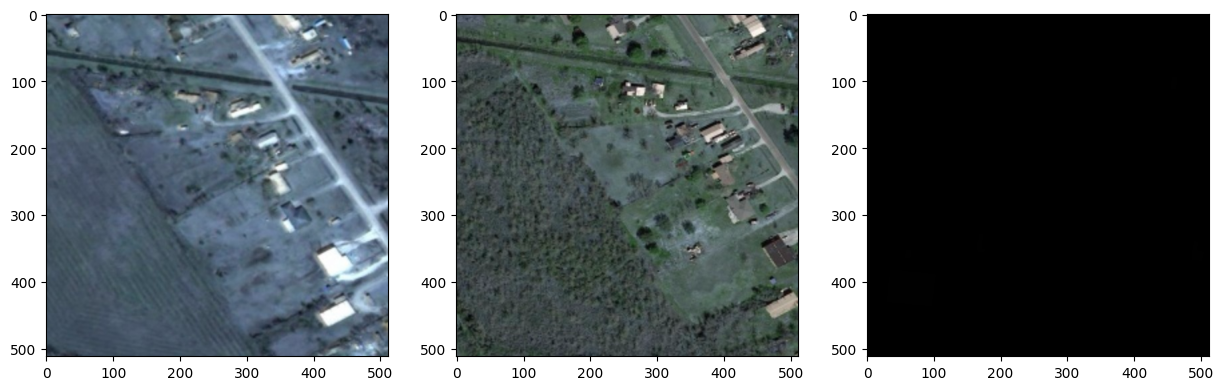

In [ ]:
# Deneme - 2

fig ,ax = plt.subplots(1,3,figsize=(15,15))
i=0
while(i<100):
    ax[0].imshow(tupleListTest[i][0])
    ax[1].imshow(tupleListTest[i][1])
    ax[2].imshow(tupleListTest[i][2])
    i=i+1

In [ ]:
# Bu fonksiyon, üç adet renkli görüntüyü alır ve her birini gri tonlamaya dönüştürerek üç gri tonlu görüntü döndürür.
# Görüntülerin boyutunu azaltmak ve işlemeyi kolaylaştırmak amacıyla kullanılır.

def convertToGray(image1,image2,image3):
    # Giriş görüntülerini kontrol
    if image1 is None or image2 is None or image3 is None:
        print("Uyarı: Giriş görüntülerinden biri boş veya geçerli değil.")

    # Görüntülerin türlerini kontrol
    if not isinstance(image1, np.ndarray) or not isinstance(image2, np.ndarray) or not isinstance(image3, np.ndarray):
        print("Giriş görüntülerinden biri NumPy dizisi değil.")

    gray1, gray2, gray3 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY), cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
    return gray1,gray2,gray3



# Bu fonksiyon, renkli görüntüleri BGR'den (Blue, Green, Red) RGB'ye (Red, Green, Blue) dönüştürmek için kullanılır.
# Bu dönüşüm, renk uzaylarının uygunluğunu sağlamak veya görsel anlamda daha doğru bir temsil elde etmek için yapılır.

def convertRgbImage(image1,image2,image3):
    # Giriş görüntülerini kontrol
    if image1 is None or image2 is None or image3 is None:
        print("Uyarı: Giriş görüntülerinden biri boş veya geçerli değil.")

    # Görüntülerin türlerini kontrol
    if not isinstance(image1, np.ndarray) or not isinstance(image2, np.ndarray) or not isinstance(image3, np.ndarray):
        print("Giriş görüntülerinden biri NumPy dizisi değil.")

    rgb1,rgb2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    return rgb1,rgb2,image3

In [ ]:
# Bu kod bloğu, bir döngü içinde tupleList adlı bir liste içinde bulunan renkli görüntü çiftlerini (img1, img2, img3) convertRgbImage fonksiyonuna geçirerek RGB renk uzayına dönüştürüyor.
# Daha sonra bu dönüştürülmüş görüntü çiftlerini rgbImg adlı bir listeye ekliyor.

rgbImg = []
for i in range(800):
    img1 = tupleList[i][0]
    img2 = tupleList[i][1]
    img3 = tupleList[i][2]
    pair1 = convertRgbImage(img1,img2,img3)
    rgbImg.append(pair1)


rgbImgTest = []
for i in range(400):
    img1 = tupleListTest[i][0]
    img2 = tupleListTest[i][1]
    img3 = tupleListTest[i][2]
    pair1Test = convertRgbImage(img1, img2, img3)
    rgbImgTest.append(pair1Test)



grayedImg = []
for i in range(800):
    img1 = tupleList[i][0]
    img2 = tupleList[i][1]
    img3 = tupleList[i][2]
    pair1 = convertToGray(img1,img2,img3)
    grayedImg.append(pair1)



grayedImgTest = []
for i in range(400):
    img1 = tupleListTest[i][0]
    img2 = tupleListTest[i][1]
    img3 = tupleListTest[i][2]
    pair1Test = convertToGray(img1,img2,img3)
    grayedImgTest.append(pair1Test)


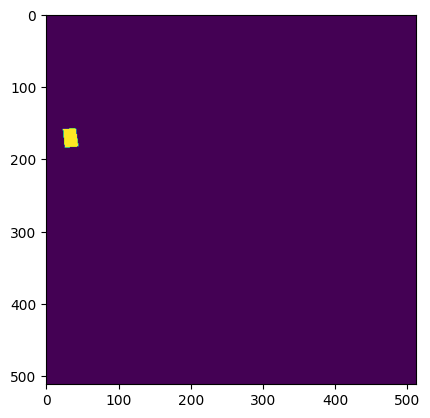

In [ ]:
imgplot = plt.imshow(grayedImg[500][2])

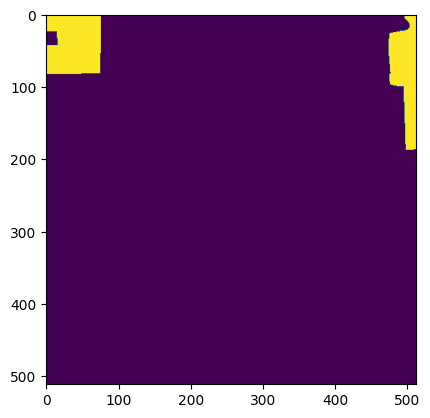

In [ ]:
imgplot = plt.imshow(grayedImgTest[200][2])

In [ ]:
# Projede kullanılan görüntülerin boyutlarını kontrol etmek ve giriş verilerinin uygunluğunu doğrulamak için kontrol ediyoruz

print(grayedImg[0][0].shape)
print(grayedImg[0][1].shape)
print(grayedImg[0][2].shape)
print(tupleList[0][0].shape)
print(tupleList[0][1].shape)
print(tupleList[0][2].shape)

(512, 512)
(512, 512)
(512, 512)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [ ]:
# "generate_data" fonksiyonu, modelin eğitim süreci için giriş verilerini oluşturmayı amaçlar
# Bu veriler, eğitim örneklerini içerir ve modelin öğrenme sürecini başlatmak için kullanılır
# Veri setinin boyutları ve modele uygunluğu sağlamak amacıyla bu fonksiyon kullanılır
# Model, RGB renk uzayında işlem yapabiliyor, bu nedenle gri tonlamalı görüntüler RGB'ye dönüştürülerek modele verilmelidir
# Ayrıca, görüntülerin boyutları belirli bir şekilde ayarlanmalıdır
# Fonksiyon, her bir eğitim örneği için önceden işleme adımlarını uygular ve bunları modele girebilecek uygun formatta veri setlerini oluşturur

def generate_data(train_data,train_data_grayscale):
  train_x_rgb,test_x_rgb,train_y_rgb,test_y_rgb = [list() for i in range(4)]
  train_x_gray,train_y_gray,test_x_gray,test_y_gray = [list() for i in range(4)]
  for images in zip(train_data,train_data_grayscale):
    rgb_list, gray_list = images
    rgb_proc, gray_proc = [],[]
    for img_rgb,img_gray in zip(rgb_list,gray_list):
      img_rgb_proc = tf.image.resize(img_rgb/255, (112, 112), method='nearest')
      img_gray_proc = tf.image.resize(np.atleast_3d(img_gray)/255, (112, 112), method='nearest')
      rgb_proc.append(img_rgb_proc)
      gray_proc.append(img_gray_proc)
    pre_rgb, post_rgb,gt_rgb = rgb_proc
    pre_gray,post_gray,gt_gray = gray_proc
    rgb_x = tf.concat([pre_rgb,post_rgb],axis=-1)
    gray_x = tf.concat([pre_gray,post_gray],axis=-1)
    train_x_rgb.append(rgb_x)
    train_y_rgb.append(gt_rgb)
    train_x_gray.append(gray_x)
    train_y_gray.append(gt_gray)
  return np.array(train_x_rgb),np.array(train_y_rgb),np.array(train_x_gray),np.array(train_y_gray)

In [ ]:
# Önceden yazılmış generate_data fonksiyonunu kullanarak eğitim ve test veri setlerini hazırlanır
# Veri setleri, RGB renk uzayında ve gri tonlamalı olarak iki farklı formatta oluşturulur

train_x_rgb,train_y_rgb,train_x_gray,train_y_gray = generate_data(rgbImg,grayedImg)
test_x_rgb,test_y_rgb,test_x_gray,test_y_gray = generate_data(rgbImgTest,grayedImgTest)

In [ ]:
# Boyut kontrolü

print(train_x_rgb.shape,train_y_rgb.shape,train_x_gray.shape,train_y_gray.shape)
print(test_x_rgb.shape,test_y_rgb.shape,test_x_gray.shape,test_y_gray.shape)

(800, 112, 112, 6) (800, 112, 112, 3) (800, 112, 112, 2) (800, 112, 112, 1)
(400, 112, 112, 6) (400, 112, 112, 3) (400, 112, 112, 2) (400, 112, 112, 1)


In [ ]:
# Bu kod bloğu TensorFlow'un tf.data.Dataset.from_tensor_slices fonksiyonunu kullanarak veri setlerini oluşturuyor
# Bu, TensorFlow modellerinin daha etkili bir şekilde eğitilmesini sağlamak için veriyi yüklemek ve işlemek için kullanılan bir veri girişi yöntemidir

train_dataset_rgb = tf.data.Dataset.from_tensor_slices((train_x_rgb, train_y_rgb))
train_dataset_gray = tf.data.Dataset.from_tensor_slices((train_x_gray, train_y_gray))


test_dataset_rgb = tf.data.Dataset.from_tensor_slices((test_x_rgb, test_y_rgb))
test_dataset_gray = tf.data.Dataset.from_tensor_slices((test_x_gray, test_y_gray))

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
# Bir evrişimli sinir ağı (Convolutional Neural Network - CNN) modelinin bir bloğunu oluşturan birimdir.
# Genellikle bu tür bloklar, evrişim katmanları, ReLU aktivasyon fonksiyonları, dropout ve toplu normalleştirme (batch normalization) katmanları içerir.

def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):

    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    # conv = BatchNormalization()(conv)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same', # Her evrişim katmanı, padding ile 'same' olarak belirlenmiş, bu da çıkışın girişle aynı boyutta olmasını sağlar.
                  kernel_initializer='he_normal')(conv) # Kernels'ların başlangıç ağırlıklarını belirler ve ağırlıkların daha etkili bir şekilde öğrenilmesine yardımcı olur.
    # conv = BatchNormalization()(conv)

    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
    #Eğer dropout_prob değeri 0'dan büyükse, dropout uygulanır. Dropout, eğitim sırasında rastgele bazı nöronları devre dışı bırakarak aşırı öğrenmeyi önler


    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
    # Eğer max_pooling True ise, max pooling uygulanır. Max pooling, girdi verisinin boyutunu azaltarak hesaplama maliyetini düşürür ve özellik çıkarlarını öne çıkarır.

    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [ ]:
# Bu fonk., bir evrişimli sinir ağı (Convolutional Neural Network - CNN) modelindeki bir bloğun "tersine çevrilmesi" için kullanılır.
# Bu genellikle bir UNet modelinde kullanılır, çünkü UNet mimarisi genellikle bir kodlayıcı (encoder) ve bir kod çözücü (decoder) içerir. Bu fonksiyon, kod çözücü tarafında bir bloğu temsil eder.

# Genişletilmiş (upsampling) giriş olarak adlandırılan tensör.
# contractive_input: Önceki katmanın çıkışı olarak adlandırılan tensör.
# n_filters: Evrişim katmanlarında kullanılacak filtre sayısı.

def upsampling_block(expansive_input, contractive_input, n_filters=32):

    up = Conv2DTranspose(
                 n_filters,
                 3,
                 strides=(2,2),
                 padding='same')(expansive_input)
    # Conv2DTranspose: Bu, evrişim katmanının tersidir ve genellikle upsampling için kullanılır. Belirli bir çekirdek boyutu, adım ve dolgu (padding) ile tanımlanır.
    # Upsampling sonrasında, genişletilmiş çıkış (up) ile önceki katmanın çıkışı (contractive_input) birleştirilir.
    # Bu birleştirilmiş tensör, evrişim katmanlarından geçirilir. Bu katmanlar, genellikle ReLU aktivasyon fonksiyonları içerir ve başlangıç ağırlıkları 'he_normal' yöntemiyle ayarlanır.

    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(merge)
    # conv = BatchNormalization()(conv)

    conv = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(conv)
    # conv = BatchNormalization()(conv)
    return conv
    # Fonksiyon, evrişim katmanlarını geçtikten sonra oluşan çıkış tensörünü döndürür

In [ ]:
# Bu fonk., U-Net adlı evrişimli sinir ağı (Convolutional Neural Network - CNN) modelini oluşturmak için kullanılır
#  Bu model, giriş görüntüsünden çıktı maskesini oluşturmak için öğrenilmiş birçok evrişimli katman içerir

# input_size: Giriş görüntü boyutunu belirten bir demet (tuple). Varsayılan olarak (112, 112, 2) olarak ayarlanmıştır
# n_filters: Evrişim katmanlarında kullanılacak başlangıç filtre sayısı
# n_classes: Çıkış katmanındaki sınıf sayısı. Varsayılan olarak 2 olarak ayarlanmıştır


def unet_model(input_size=(112, 112, 2), n_filters=16, n_classes=2):
    inputs = Input(input_size)
    cblock1 = conv_block(inputs, n_filters)
    cblock2 = conv_block(cblock1[0], 2*n_filters)
    cblock3 = conv_block(cblock2[0], 4*n_filters)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.3)

    cblock5 = conv_block(cblock4[0], 16*n_filters, dropout_prob=0.3, max_pooling=False)

    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8*n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  4*n_filters)
    ublock8 = upsampling_block(ublock7, cblock2[1],  2*n_filters)
    ublock9 = upsampling_block(ublock8, cblock1[1],  n_filters)
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    # conv9 = BatchNormalization()(conv9)
    tf.keras.layers.Dropout(0.5,noise_shape=None, seed=None)

    # Bir çıkış katmanı eklenir. Bu katman, sınıf sayısına göre düzenlenmiş bir çıkış üretir
    # Aktivasyon fonksiyonu olarak sigmoid kullanılarak, her bir pikselin bağımsız olarak değerlendirildiği bir ikili sınıflandırma probleminde kullanılır
    conv10 = Conv2D(n_classes, 1, padding='same',activation='sigmoid')(conv9)
    # conv10 = tf.keras.layers.Softmax()(conv10)

    # tf.keras.Model sınıfı kullanılarak, giriş ve çıkış katmanları belirtilerek bir model oluşturulur
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

    # Bu fonk., U-Net modelinin oluşturulmasını sağlar ve daha sonra bu modelin eğitim ve değerlendirme işlemleri için kullanılabilir

In [ ]:
# Önceden tanımlanmış olan unet_model fonksiyonunu kullanarak bir U-Net modeli oluşturur

img_height = 112
img_width = 112
num_channels = 2 # Giriş görüntülerinin kaç kanallı olduğunu belirten değişkendir

unet = unet_model((img_height, img_width, num_channels))

In [ ]:
# Model özeti

unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 16  304         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 112, 112, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# İki bölgeyi, yani tahmin edilen ve gerçek etiketleri karşılaştırır, bir kayıp fonk.

# y_true: Gerçek etiketleri temsil eden tensor
# y_pred: Tahmin edilen etiketleri temsil eden tensor

# Dice Loss, 0 ile 1 arasında bir değer alır, 0'a yaklaştıkça kayıp artar
# Bu kayıp fonk., görüntü segmentasyonu görevlerinde özellikle nesne sınıflandırma konusunda kullanılır ve modelin tahminlerini iyileştirmeye yardımcı olabilir

def dice_loss_v2(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1,2,3))
    denominator = tf.reduce_sum(y_true + y_pred, axis=(1,2,3))

    return 1 - numerator / denominator

In [ ]:
# U-Net modelinin derlenmesi (compile) işlemi için kullanılır
# U-Net modeli, derleme işlemi sırasında optimize edici (optimizer), kayıp fonksiyonu (loss), ve metrikler belirlenir
# Derleme işlemi, modelin eğitim için hazır hale getirilmesini sağlar

# optimizer='adam': Adam optimize edici seçilmiştir. Adam, adaptif momentum ile gradient descent algoritmasını birleştiren etkili bir optimize edici yöntemidir.

# loss=dice_loss_v2: Kayıp fonksiyonu olarak dice_loss_v2 fonksiyonu belirlenmiştir. Bu, önceki soruda açıklanan Dice kaybını hesaplayan özel bir kayıp fonksiyonudur.

# metrics=['accuracy']: Eğitim sırasında izlenecek metrikler belirlenir. Bu durumda, modelin doğruluğu (accuracy) metriği seçilmiştir.

unet.compile(optimizer='adam',
              loss=dice_loss_v2,
              metrics=['accuracy'])

In [ ]:
# U-Net modelinin eğitimini başlatma

tf.config.run_functions_eagerly(True)
EPOCHS = 5
# VAL_SUBSPLITS = 5
# BUFFER_SIZE = 100
BATCH_SIZE = 32
train_dataset = train_dataset_rgb.shuffle(14).batch(BATCH_SIZE)
model_history = unet.fit(train_x_gray,train_y_gray, epochs=EPOCHS,batch_size = BATCH_SIZE,validation_data=(test_x_gray,test_y_gray))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
25/25 [==============================] - 17s 300ms/step - loss: 0.9998 - accuracy: 0.9439 - val_loss: 0.9998 - val_accuracy: 0.9607
Epoch 2/5
25/25 [==============================] - 6s 221ms/step - loss: 0.9998 - accuracy: 0.8611 - val_loss: 0.9998 - val_accuracy: 0.7909
Epoch 3/5
25/25 [==============================] - 5s 211ms/step - loss: 0.9998 - accuracy: 0.8159 - val_loss: 0.9998 - val_accuracy: 0.9160
Epoch 4/5
25/25 [==============================] - 6s 247ms/step - loss: 0.9998 - accuracy: 0.8724 - val_loss: 0.9998 - val_accuracy: 0.8838
Epoch 5/5
25/25 [==============================] - 5s 207ms/step - loss: 0.9998 - accuracy: 0.9347 - val_loss: 0.9998 - val_accuracy: 0.9611


In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Pre','Input Post', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def show_predictions(test_x_rgb,test_y_gray, num=10):
  count = 0
  for image, mask in zip(test_x_rgb,test_y_gray):
    # print(image.shape,mask.shape)
    pred_mask = unet.predict(image[np.newaxis,:,:,:])
    display([image[:,:,0:1],image[:,:,1:2] ,mask, create_mask(pred_mask)])
    count += 1
    if count>=num:
      break

1/1 [==============================] - 1s 922ms/step


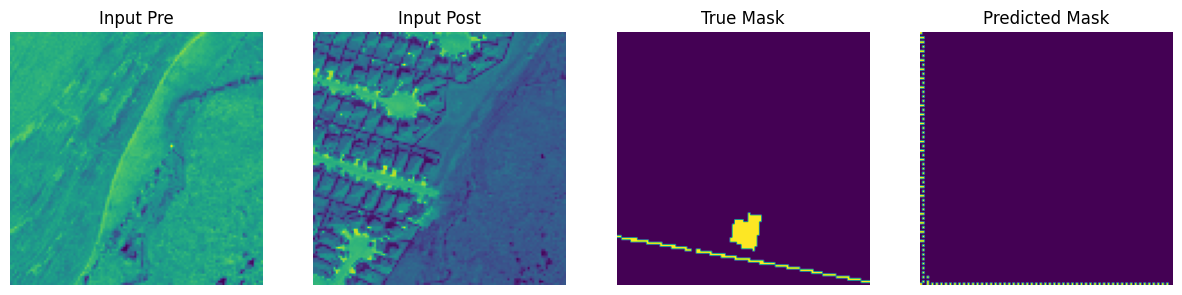

1/1 [==============================] - 0s 70ms/step


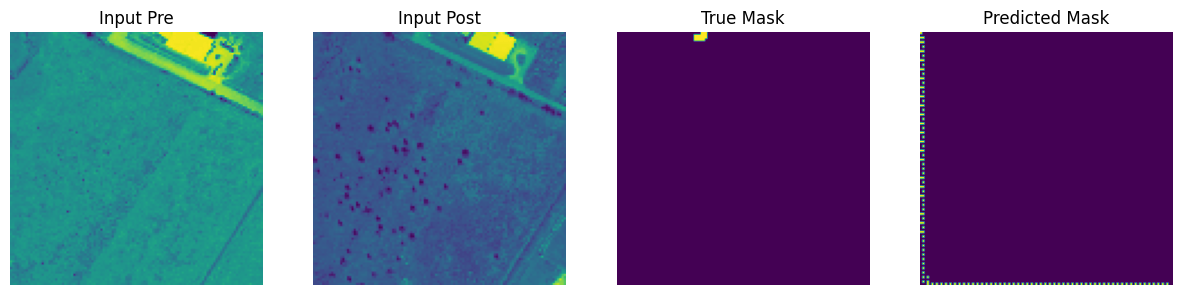

1/1 [==============================] - 0s 45ms/step


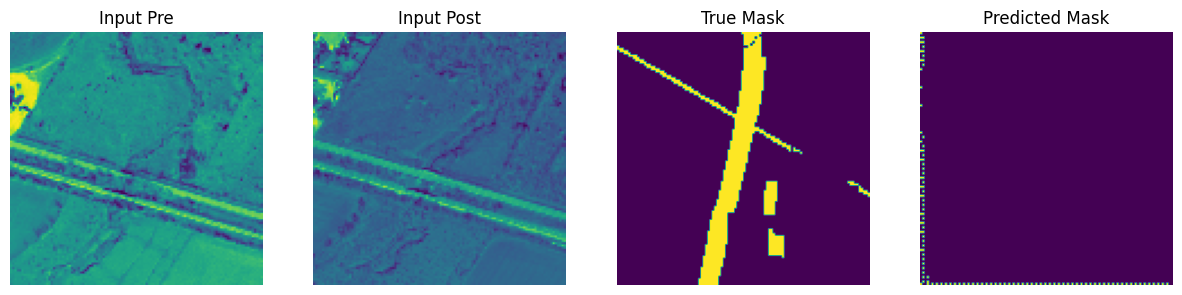

1/1 [==============================] - 0s 42ms/step


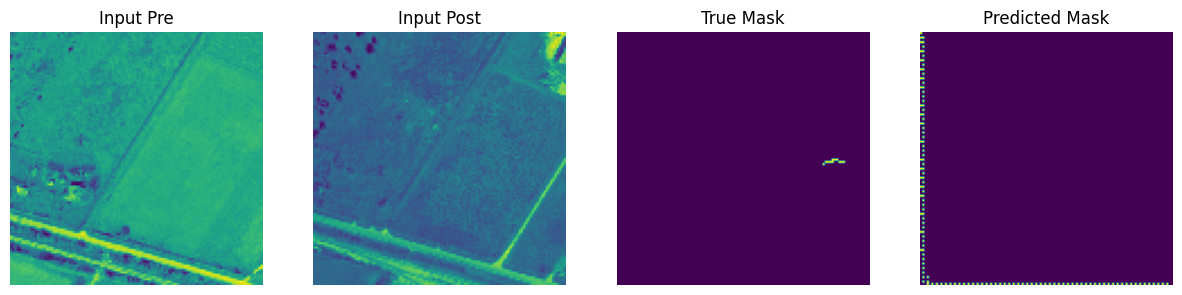

1/1 [==============================] - 0s 41ms/step


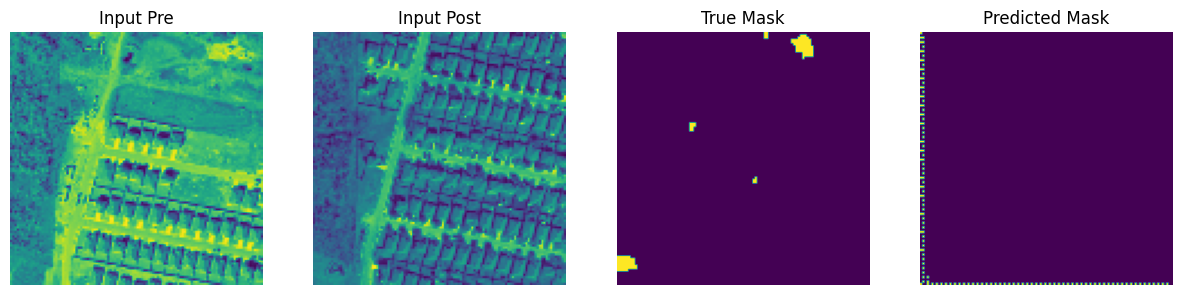

1/1 [==============================] - 0s 47ms/step


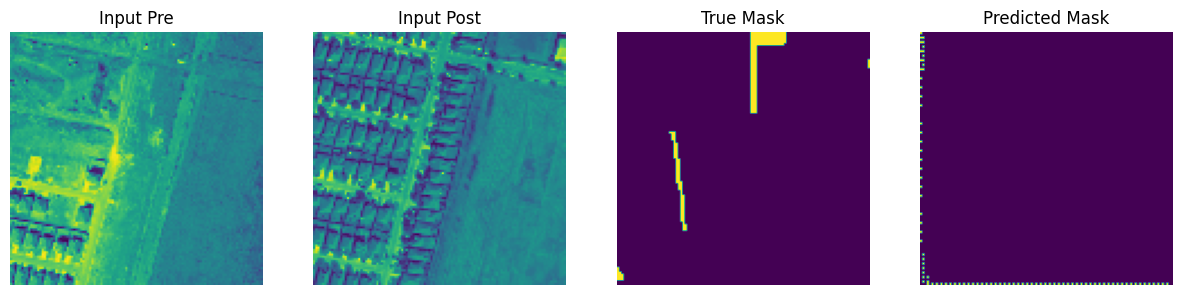

1/1 [==============================] - 0s 47ms/step


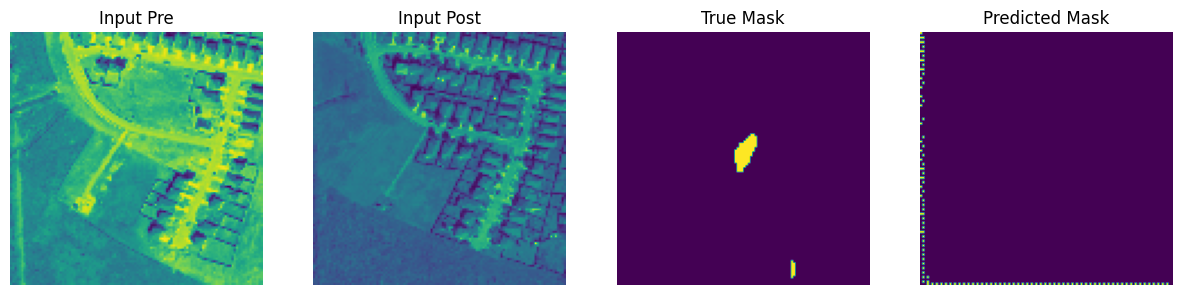

1/1 [==============================] - 0s 47ms/step


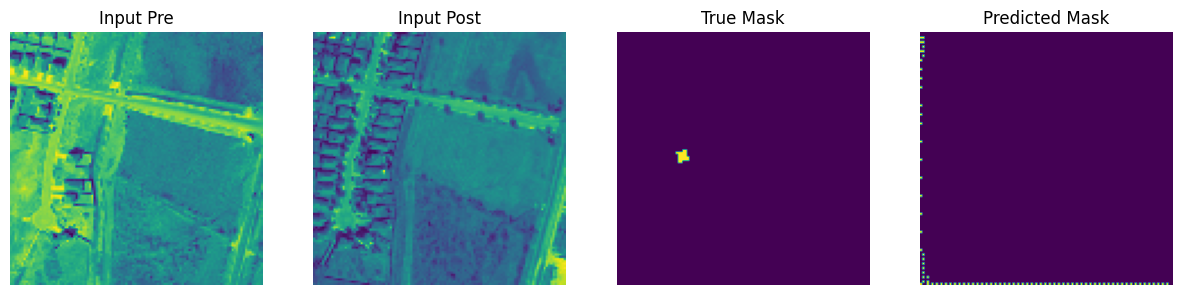

1/1 [==============================] - 0s 58ms/step


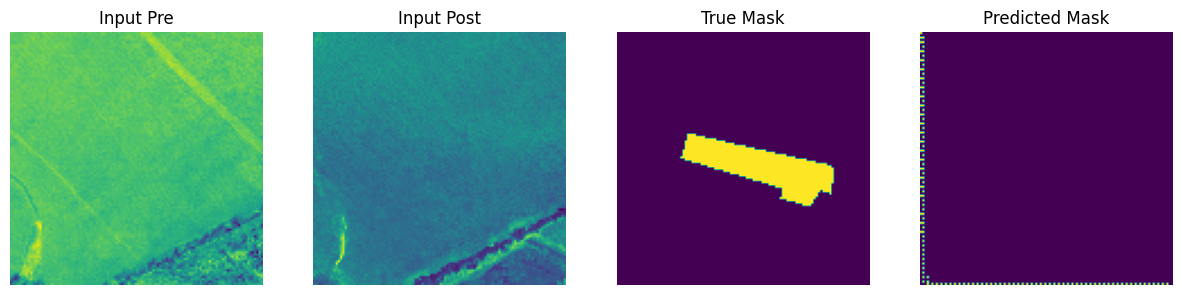

1/1 [==============================] - 0s 54ms/step


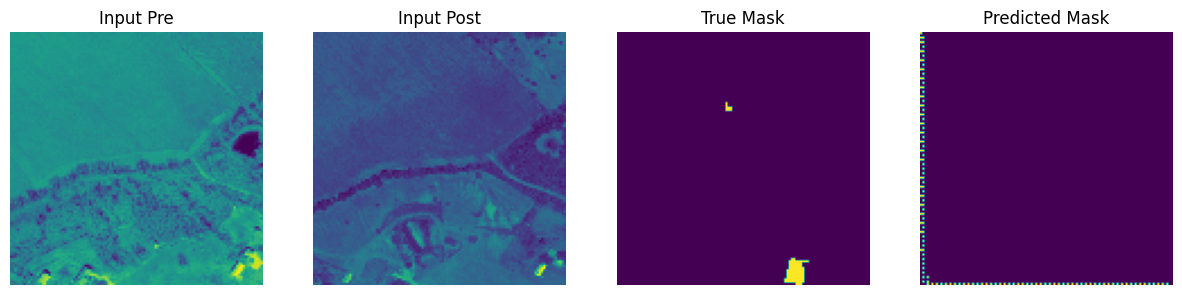

In [ ]:
show_predictions(train_x_gray,train_y_gray,)

In [ ]:
# Evaluating the result

In [ ]:
def plot_accuracy_loss(model_history):

    fig = plt.figure(figsize=(15,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(model_history.history['accuracy'],'bo--', label = "acc")
    plt.plot(model_history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(model_history.history['loss'],'bo--', label = "loss")
    plt.plot(model_history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

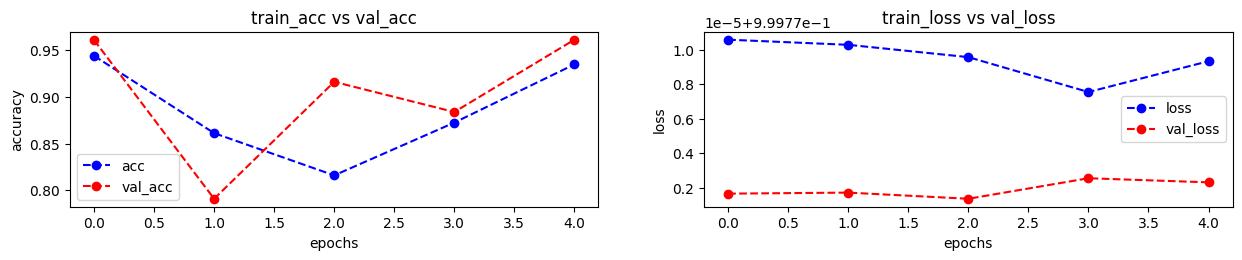

In [ ]:
plot_accuracy_loss(model_history)

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 [==============================] - 1s 45ms/step


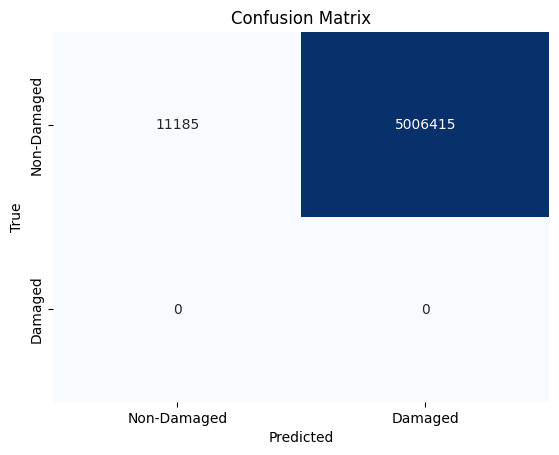

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def show_predictions(model, test_data, num=10):
    count = 0
    for image, mask in test_data:
        pred_mask = model.predict(image[np.newaxis, :, :, :])
        display([image[:, :, 0:1], image[:, :, 1:2], mask, create_mask(pred_mask)])
        count += 1
        if count >= num:
            break

def create_binary_mask(mask):
    # Convert mask to binary (1 or 0)
    binary_mask = (mask > 0.5).astype(int)
    return binary_mask.flatten()

# Make predictions on the test data
predictions = unet.predict(test_x_gray)

# Convert predictions and ground truth to binary masks
binary_predictions = create_binary_mask(predictions)
binary_ground_truth = create_binary_mask(test_y_gray)

# Ensure shapes match
if binary_ground_truth.shape != binary_predictions.shape:
    # If shapes do not match, resize predictions to the ground truth shape
    binary_predictions = binary_predictions[:binary_ground_truth.shape[0]]

# Calculate confusion matrix
conf_matrix = confusion_matrix(binary_ground_truth, binary_predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Damaged', 'Damaged'], yticklabels=['Non-Damaged', 'Damaged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained model
unet.save("my_model.v1")
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks')